<a href="https://colab.research.google.com/github/rsztjnxz/CS634-midterm/blob/main/midtern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (10 points) Draw a network architecture that includes few fully connected layers and is able to perform classification on the Fashion MNIST dataset: https://github.com/zalandoresearch/fashion-mnist. 

Define the network to your liking - it can be as simple or as complex as you can make it. The network will be considered correct if all dimensions involved are fully specified.

Convolutional neural networks(CNN)

![picture]https://drive.google.com/uc?export=view&id=1M-zMNwuXXJ3uyrwPPRWLoNwR9y8BtYaF

![picture]https://drive.google.com/uc?export=view&id=1k5AXde57Cbzu2AdKPCw4SG89SJmZMbBQ

2. (10 points) Train the network in Colab (you need to enable the GPU runtime) and plot the average loss vs SGD iteration as well as its precision vs recall curve. Clearly state and show your hyperparameter optimization strategy.

In [ ]:
import torch  
from torch import nn, optim  
import torch.nn.functional as F 
from torchvision import datasets, transforms 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
# down Fashion-MNIST trainset and built trainloader. Everytime load 64 images from the training set at a time, disrupting the order of each load
train_set = datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# down Fashion-MNIST testset and built testloader. Everytime load 64 images from the training set at a time, disrupting the order of each load
test_set = datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
# Instantiation of the Classifier class defined above
model = Classifier()

# Define the loss function as a negative logarithmic loss function
criterion = nn.NLLLoss()

# The optimization method is Adam gradient descent method with a learning rate of 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

#  Learn all the data in the training set 7 times, the larger the number, the longer the training time
epochs  = 7

# Store the training error and test error for plotting latter
train_losses, test_losses = [], []

print('Start Training')
for e in range(epochs):
    running_loss = 0 
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        # Extrapolate the 64 images, calculate the loss function, back-propagate the optimized weights, and sum the losses
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            
            for images, labels in test_loader:
                # Perform forward inference on incoming test set images, calculate the loss, accuracy is the model prediction correct rate among 10,000 images in the test set
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # The right side of the equal sign is the percentage of correct predictions in each batch of 64 test images
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Training set learning times: {}/{}.. ".format(e+1, epochs),
              "training error: {:.3f}.. ".format(running_loss/len(train_loader)),
              "test error: {:.3f}.. ".format(test_loss/len(test_loader)),
              "accuracy: {:.3f}".format(accuracy/len(test_loader)))

Start Training
Training set learning times: 1/7..  training error: 0.572..  test error: 0.546..  accuracy: 0.810
Training set learning times: 2/7..  training error: 0.469..  test error: 0.470..  accuracy: 0.833
Training set learning times: 3/7..  training error: 0.426..  test error: 0.455..  accuracy: 0.839
Training set learning times: 4/7..  training error: 0.416..  test error: 0.446..  accuracy: 0.838
Training set learning times: 5/7..  training error: 0.411..  test error: 0.442..  accuracy: 0.848
Training set learning times: 6/7..  training error: 0.396..  test error: 0.448..  accuracy: 0.844
Training set learning times: 7/7..  training error: 0.410..  test error: 0.456..  accuracy: 0.848


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Validate the model effect

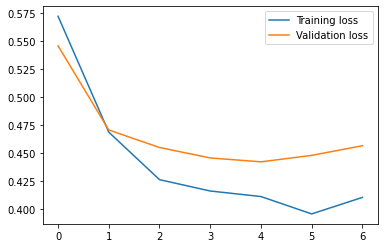

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

To get better model, I decided to use the drop-out method to prevent overfitting and change some parameter like learning rate and epochs. 

3. (10 points) Randomly shuffle (permute) the pixels of the input images such that the pixel $(i,j)$ is randomly replaced with another pixel $(k,l)$ and repeat the training exercise, plotting the average loss vs SGD iteration number as well as the precision vs recall curve.

In [ ]:
import random

for e in range(epochs):
    running_loss = 0 
    for images, labels in train_loader:
        random.shuffle(images)
        optimizer.zero_grad()
        
        # Extrapolate the 1 images, calculate the loss function, back-propagate the optimized weights, and sum the losses
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            
            for images, labels in test_loader:
                # Perform forward inference on incoming test set images, calculate the loss, accuracy is the model prediction correct rate among 10,000 images in the test set
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # The right side of the equal sign is the percentage of correct predictions in each batch of 64 test images
                accuracy += torch.mean(equals.type(torch.FloatTensor))




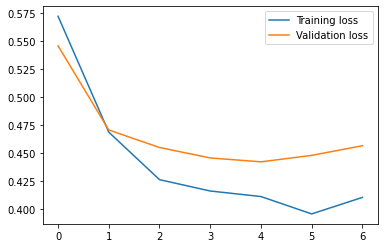

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

4. (10 points) Randomly shuffle (permute) the labels such that the label $y_j$ is replaced with another $y_k$ (obviously though within the range 0-9) and repeat the training exercise, plotting plotting the average loss vs SGD iteration number as well as the precision vs recall curve.

The neural network guesses that in the picture is  Bag，Probability be 99.94175434112549%


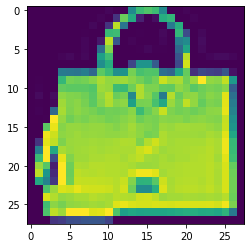

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# Convert the test image to a one-dimensional column vector
img = torch.from_numpy(img)
img = img.view(1, 784)

# Perform positive inference to predict the category in which the image is located
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
prediction = labellist[top_class]
probability = float(top_p)
print(f'The neural network guesses that in the picture is  {prediction}，Probability be {probability*100}%')

In [ ]:
images = random.shuffle(images)

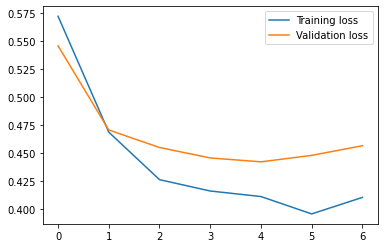

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()


5. (5 points)  Compare your findings against the findings of [this important paper](https://arxiv.org/pdf/1611.03530.pdf)


In my work, the accuracy is not as high as it could be in paper. Maybe I have to try different model and add more paramter and test more data everytime.